In [ ]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [3]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
#selected_features = df.drop(['koi_disposition'], axis = 1)
X = df.drop(['koi_disposition'], axis = 1)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
y = df['koi_disposition']
y_names = ['CONFIRMED','FALSE POSITIVE','CANDIDATE']
y
#df.koi_disposition.value_counts()

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
#y_train

((5592, 40), (1399, 40), (5592,), (1399,))

In [7]:
X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5807,0,1,0,0,3.495458,9.350000e-07,-9.350000e-07,132.083941,0.000214,-0.000214,...,-93,4.249,0.063,-0.108,1.558,0.266,-0.143,294.07187,38.426922,13.444
5251,1,0,0,0,360.477635,9.877000e-03,-9.877000e-03,253.911200,0.020100,-0.020100,...,-134,4.101,0.161,-0.120,1.522,0.313,-0.305,296.96027,46.034302,14.327
1177,0,0,0,0,18.684838,5.270000e-05,-5.270000e-05,136.145870,0.002290,-0.002290,...,-91,4.712,0.027,-0.030,0.545,0.030,-0.030,299.26804,45.227428,15.434
5725,0,0,0,0,6.276516,5.870000e-05,-5.870000e-05,136.180320,0.008070,-0.008070,...,-107,4.748,0.050,-0.050,0.515,0.054,-0.054,289.15955,40.511810,15.516
6811,0,0,0,0,432.427870,3.739000e-02,-3.739000e-02,361.407800,0.039400,-0.039400,...,-188,4.460,0.054,-0.216,1.009,0.335,-0.112,289.66574,43.879459,13.814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0,1,0,0,34.064566,6.860000e-06,-6.860000e-06,150.452048,0.000163,-0.000163,...,-215,4.517,0.052,-0.208,0.892,0.269,-0.090,293.38663,45.870270,15.443
4736,0,0,0,0,34.026987,4.382000e-04,-4.382000e-04,164.796380,0.009310,-0.009310,...,-132,4.514,0.068,-0.812,0.801,1.347,-0.077,293.01563,45.166740,15.592
3877,0,1,0,0,1.278555,7.720000e-07,-7.720000e-07,131.529071,0.000545,-0.000545,...,-186,4.557,0.044,-0.176,0.827,0.217,-0.078,295.08237,47.086250,15.643
6706,1,0,0,0,315.810650,2.180000e-02,-2.180000e-02,172.543000,0.039400,-0.039400,...,-145,4.514,0.078,-0.042,0.810,0.050,-0.081,295.03894,43.477329,15.374


In [8]:
y_train

5807    FALSE POSITIVE
5251    FALSE POSITIVE
1177         CONFIRMED
5725         CANDIDATE
6811         CANDIDATE
             ...      
612     FALSE POSITIVE
4736         CANDIDATE
3877    FALSE POSITIVE
6706    FALSE POSITIVE
502          CONFIRMED
Name: koi_disposition, Length: 5592, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
#y_minmax = MinMaxScaler().fit(y_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)
#y_train = y_minmax.transform(y_train)
#y_test = y_minmax.transform(y_test)


# Train the Model



k: 1, Train/Test Score: 1.000/0.804
k: 3, Train/Test Score: 0.902/0.813
k: 5, Train/Test Score: 0.880/0.823
k: 7, Train/Test Score: 0.875/0.828
k: 9, Train/Test Score: 0.869/0.823
k: 11, Train/Test Score: 0.858/0.822
k: 13, Train/Test Score: 0.852/0.823
k: 15, Train/Test Score: 0.849/0.826
k: 17, Train/Test Score: 0.846/0.828
k: 19, Train/Test Score: 0.845/0.831
k: 21, Train/Test Score: 0.842/0.831
k: 23, Train/Test Score: 0.839/0.826
k: 25, Train/Test Score: 0.840/0.825
k: 27, Train/Test Score: 0.836/0.831
k: 29, Train/Test Score: 0.834/0.829
k: 31, Train/Test Score: 0.834/0.831
k: 33, Train/Test Score: 0.832/0.833
k: 35, Train/Test Score: 0.831/0.832
k: 37, Train/Test Score: 0.832/0.829
k: 39, Train/Test Score: 0.831/0.828


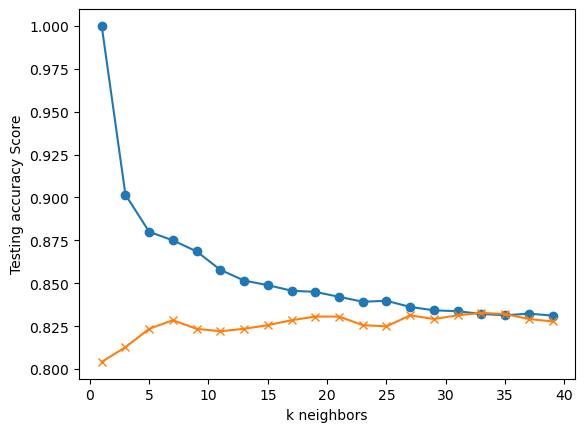

In [10]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=1 Test Acc: 0.804


In [12]:




print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")



Training Data Score: 1.0
Testing Data Score: 0.8041458184417442


In [13]:
#Dinnara
predictions = knn.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['FALSE POSITIVE' 'FALSE POSITIVE' 'CANDIDATE' 'FALSE POSITIVE'
 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CANDIDATE'
 'FALSE POSITIVE' 'FALSE POSITIVE']
First 10 Actual labels: ['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE', 'CANDIDATE', 'CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE', 'CANDIDATE']


In [14]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,FALSE POSITIVE,CANDIDATE
1,FALSE POSITIVE,CONFIRMED
2,CANDIDATE,FALSE POSITIVE
3,FALSE POSITIVE,CANDIDATE
4,FALSE POSITIVE,CANDIDATE
...,...,...
1394,FALSE POSITIVE,FALSE POSITIVE
1395,FALSE POSITIVE,FALSE POSITIVE
1396,FALSE POSITIVE,FALSE POSITIVE
1397,FALSE POSITIVE,FALSE POSITIVE


In [15]:
knn.classes_

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [16]:
knn.predict(X)

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', ...,
       'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [17]:
# Create the GridSearchCV model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}
    
grid = GridSearchCV(classifier, param_grid, verbose=3, return_train_score=True)

In [18]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .n_neighbors=1;, score=(train=1.000, test=0.777) total time=   0.1s
[CV 2/5] END .n_neighbors=1;, score=(train=1.000, test=0.798) total time=   0.1s
[CV 3/5] END .n_neighbors=1;, score=(train=1.000, test=0.804) total time=   0.1s
[CV 4/5] END .n_neighbors=1;, score=(train=1.000, test=0.794) total time=   0.1s
[CV 5/5] END .n_neighbors=1;, score=(train=1.000, test=0.801) total time=   0.1s
[CV 1/5] END .n_neighbors=3;, score=(train=0.905, test=0.790) total time=   0.1s
[CV 2/5] END .n_neighbors=3;, score=(train=0.898, test=0.826) total time=   0.1s
[CV 3/5] END .n_neighbors=3;, score=(train=0.898, test=0.827) total time=   0.1s
[CV 4/5] END .n_neighbors=3;, score=(train=0.903, test=0.825) total time=   0.1s
[CV 5/5] END .n_neighbors=3;, score=(train=0.901, test=0.809) total time=   0.1s
[CV 1/5] END .n_neighbors=5;, score=(train=0.884, test=0.803) total time=   0.1s
[CV 2/5] END .n_neighbors=5;, score=(train=0.881

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29]},
             return_train_score=True, verbose=3)

In [19]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 13}
0.8213551583400077


In [24]:
#Dinnara
predictions = grid.predict(X_test_scaled)

In [25]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['CONFIRMED' 'CONFIRMED' 'FALSE POSITIVE' 'CONFIRMED' 'CONFIRMED'
 'CONFIRMED' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED' 'CANDIDATE']
First 10 Actual labels: ['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE', 'CANDIDATE', 'CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE', 'CANDIDATE']


In [26]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=y_names))

                precision    recall  f1-score   support

     CONFIRMED       0.66      0.46      0.54       306
FALSE POSITIVE       0.64      0.77      0.70       358
     CANDIDATE       0.98      1.00      0.99       735

      accuracy                           0.82      1399
     macro avg       0.76      0.74      0.74      1399
  weighted avg       0.82      0.82      0.82      1399



In [23]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004101,0.001528,0.050217,0.005334,1,{'n_neighbors': 1},0.777480,0.798034,0.804114,0.794275,...,0.795067,0.009392,15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003355,0.000023,0.064911,0.001220,3,{'n_neighbors': 3},0.789991,0.825737,0.827370,0.824687,...,0.815274,0.014341,14,0.904762,0.898055,0.898078,0.902995,0.901430,0.901064,0.002665
2,0.003363,0.000020,0.094353,0.004527,5,{'n_neighbors': 5},0.802502,0.822163,0.828265,0.826476,...,0.820461,0.009257,3,0.884418,0.880841,0.881314,0.877515,0.881761,0.881170,0.002209
3,0.003353,0.000019,0.090391,0.003668,7,{'n_neighbors': 7},0.805183,0.815013,0.820215,0.826476,...,0.817957,0.007402,10,0.872792,0.869215,0.871256,0.868350,0.867009,0.869725,0.002063
4,0.003351,0.000013,0.095265,0.004564,9,{'n_neighbors': 9},0.803396,0.819482,0.818426,0.828265,...,0.818672,0.008394,7,0.869662,0.859826,0.863433,0.862092,0.862763,0.863555,0.003286
5,0.003361,0.000014,0.092627,0.003776,11,{'n_neighbors': 11},0.806971,0.828418,0.814848,0.818426,...,0.819922,0.008826,5,0.856919,0.854237,0.855387,0.850916,0.855163,0.854524,0.001999
6,0.003361,0.000014,0.094194,0.002519,13,{'n_neighbors': 13},0.805183,0.819482,0.816637,0.826476,...,0.821355,0.011179,1,0.854237,0.849765,0.855610,0.845105,0.850693,0.851082,0.003690
7,0.003360,0.000015,0.092899,0.002923,15,{'n_neighbors': 15},0.807864,0.821269,0.816637,0.827370,...,0.820460,0.007712,4,0.850212,0.845294,0.850693,0.842423,0.842199,0.846164,0.003671
8,0.003336,0.000022,0.093425,0.002379,17,{'n_neighbors': 17},0.805183,0.814120,0.818426,0.822004,...,0.817421,0.007505,11,0.847082,0.844176,0.843764,0.837953,0.840858,0.842767,0.003112
9,0.003372,0.000031,0.094589,0.002626,19,{'n_neighbors': 19},0.804290,0.822163,0.820215,0.829159,...,0.820818,0.008949,2,0.844400,0.844176,0.838623,0.839741,0.840411,0.841470,0.002372


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)